In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

/home/emcy/miniconda3/envs/drlnd/lib/python3.6/site-packages/gym/core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [2]:
from unityagents import UnityEnvironment
env = UnityEnvironment(file_name="/data1/Projects/Udacity_RL/Value-based-methods/BananaCollector/Banana_Linux/Banana.x86_64")
#env = UnityEnvironment(file_name="/data1/Projects/Udacity_RL/Value-based-methods/BananaCollector/Banana_Linux_NoVis/Banana.x86_64")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [3]:
import time
from dqn_agent import Agent

for i in range(0,5):
    start = time.time()
    agent = Agent(state_size=state_size, action_size=action_size, seed=0)

    # watch an untrained agent
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0] 
    score = 0  
    while True:
        #print(state, type(state))
        action = agent.act(state)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        score += reward
        state = next_state
        if done:
            break 

    #env.close()
    print("Score:", score)
    end = time.time()
    print(str(end-start) + "seconds elapsed") 

Score: 0.0
31.35106587409973seconds elapsed
Score: 0.0
30.0166437625885seconds elapsed


KeyboardInterrupt: 

In [4]:
from dqn_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.__dict__

{'state_size': 37,
 'action_size': 4,
 'seed': None,
 'qnetwork_local': QNetwork(
   (fc1): Linear(in_features=37, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=4, bias=True)
 ),
 'qnetwork_target': QNetwork(
   (fc1): Linear(in_features=37, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=64, bias=True)
   (fc3): Linear(in_features=64, out_features=4, bias=True)
 ),
 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 5e-05
     weight_decay: 0
 ),
 'memory': <dqn_agent.ReplayBuffer at 0x7f82b23443c8>,
 't_step': 0}

Episode 100	Average Score: -0.16 	 0.50 Seconds Elapsed
Episode 200	Average Score: -0.08 	 0.50 Seconds Elapsed
Episode 300	Average Score: -0.40 	 0.50 Seconds Elapsed
Episode 400	Average Score: -0.04 	 0.50 Seconds Elapsed
Episode 500	Average Score: 0.00 	 0.52 Seconds Elapsedd
Episode 600	Average Score: 0.08 	 0.51 Seconds Elapsedd
Episode 700	Average Score: -0.06 	 0.50 Seconds Elapsed
Episode 800	Average Score: 0.04 	 0.51 Seconds Elapsedd
Episode 900	Average Score: -0.14 	 0.52 Seconds Elapsed
Episode 1000	Average Score: -0.02 	 0.51 Seconds Elapsed
Episode 1100	Average Score: 0.04 	 0.50 Seconds Elapsedd
Episode 1200	Average Score: -0.12 	 0.50 Seconds Elapsed
Episode 1300	Average Score: 0.02 	 0.52 Seconds Elapsedd
Episode 1400	Average Score: 0.18 	 0.50 Seconds Elapsedd
Episode 1500	Average Score: 0.00 	 0.51 Seconds Elapsedd
Episode 1600	Average Score: 0.10 	 0.51 Seconds Elapsedd
Episode 1700	Average Score: -0.10 	 0.51 Seconds Elapsed
Episode 1800	Average Score: 0.02 	 0.51 

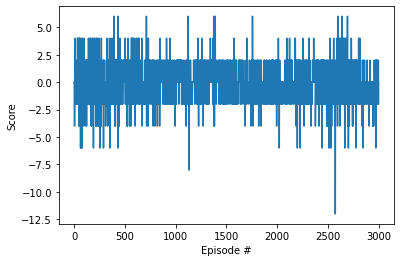

In [5]:
import time
def dqn(n_episodes=2000, max_t=100000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        
        start = time.time()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            score += reward
            state = next_state
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        end = time.time() 
        print('\rEpisode {}\tAverage Score: {:.2f} \t {:.2f} Seconds Elapsed'.format(i_episode, np.mean(scores_window), end-start), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=10.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
         
            
    return scores


from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(n_episodes=3000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## env.close()